# Student Mental Health Dataset from Kaggle

In [1]:
#import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# read data
data = pd.read_csv("Student Mental health.csv")

In [3]:
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [4]:
#understanding data
data.shape

(101, 11)

In [5]:
data.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

Excluding Age, All data is qulaitative since they're all objects. 
### Data cleaning

In [6]:
data.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

1. Renaming cols to more easy to use ones. 

In [7]:
data.rename(columns={"Choose your gender":"gender","What is your course?":"course","Your current year of Study":"studying_year",\
                     "What is your CGPA?":"CGPA","Do you have Depression?":"isDepression","Do you have Anxiety?":"isAnxiety",\
                    "Do you have Panic attack?":"isPanic","Did you seek any specialist for a treatment?":"treatment"},inplace=True)

In [8]:
data.columns

Index(['Timestamp', 'gender', 'Age', 'course', 'studying_year', 'CGPA',
       'Marital status', 'isDepression', 'isAnxiety', 'isPanic', 'treatment'],
      dtype='object')

2. Check if there are any missing values

In [9]:
data.isna().sum()

Timestamp         0
gender            0
Age               1
course            0
studying_year     0
CGPA              0
Marital status    0
isDepression      0
isAnxiety         0
isPanic           0
treatment         0
dtype: int64

In [10]:
#handeling missing values in Age col
nan = data["Age"].isna()==True 
data[nan]

,Timestamp,gender,Age,course,studying_year,CGPA,Marital status,isDepression,isAnxiety,isPanic,treatment
43,8/7/2020 15:07,Male,NaN,BIT,year 1,0 - 1.99,No,No,No,No,No


In [11]:
# I handled it by filling it with a constant, since we only have 1 missing and the person in year 1 -> age :18
data[nan] = data[nan].fillna(18)
data[nan]

,Timestamp,gender,Age,course,studying_year,CGPA,Marital status,isDepression,isAnxiety,isPanic,treatment
43,8/7/2020 15:07,Male,18.0,BIT,year 1,0 - 1.99,No,No,No,No,No


In [12]:
#just making sure it changed in the dataframe
data.iloc[43]

Timestamp         8/7/2020 15:07
gender                      Male
Age                         18.0
course                       BIT
studying_year             year 1
CGPA                    0 - 1.99
Marital status                No
isDepression                  No
isAnxiety                     No
isPanic                       No
treatment                     No
Name: 43, dtype: object

In [13]:
data.isna().sum()

Timestamp         0
gender            0
Age               0
course            0
studying_year     0
CGPA              0
Marital status    0
isDepression      0
isAnxiety         0
isPanic           0
treatment         0
dtype: int64

no more missing values! good. <br> 
3. Check if there are any noisy or inconsistent values.

In [14]:
data.dtypes

Timestamp          object
gender             object
Age               float64
course             object
studying_year      object
CGPA               object
Marital status     object
isDepression       object
isAnxiety          object
isPanic            object
treatment          object
dtype: object

In [15]:
data["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [16]:
data["Age"].unique()

array([18., 21., 19., 22., 23., 20., 24.])

In [17]:
data["course"].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

There are many courses that are related to the same topic, such as: Islamics, Laws, Engineering .. 

In [30]:
#matching related courses together (inconsistent data)
data["course"].replace(["Law","Islamic education","Pendidikan islam","Pendidikan Islam ","Fiqh fatwa ","Fiqh","Islamic Education","Pendidikan Islam","Business Administration","Engine","engin","Diploma Nursing","Nursing ","Banking Studies  ","Econs","Accounting","psychology","Banking Studies","Accounting ","Biomedical science","Biotechnology ","koe","Koe","Benl","Usuluddin","Kirkhs","Irkhs"],\
                       ["Laws","Islamic","Islamic","Islamic","Islamic","Islamic","Islamic","Islamic","Economy","Engineering","Engineering","Nursing","Nursing","Economy","Economy","Economy","Psychology","Economy","Economy","Biotechnology","Biotechnology","KOE","KOE","BENL","Islamic","KIRKHS","KIRKHS"],inplace=True)

In [31]:
data["course"].unique()

array(['Engineering', 'Islamic', 'BIT', 'Laws', 'Mathemathics', 'BCS',
       'Human Resources', 'KIRKHS', 'Psychology', 'KENMS', 'Economy',
       'ENM', 'Marine science', 'KOE', 'Usuluddin ', 'TAASL', 'ALA',
       'Biotechnology', 'BENL', 'IT', 'CTS', 'MHSC', 'Malcom', 'Kop',
       'Human Sciences ', 'Communication ', 'Nursing', 'Radiography',
       'DIPLOMA TESL'], dtype=object)

In [32]:
data["studying_year"].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [33]:
#inconsistent data
data["studying_year"].replace(["Year 1","Year 2","Year 3","Year 4"],["year 1","year 2","year 3","year 4"],inplace=True)

In [34]:
data["CGPA"].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [35]:
#inconsistent data
data["CGPA"].replace("3.50 - 4.00 ","3.50 - 4.00",inplace=True)

In [36]:
data["Marital status"].unique()

array(['No', 'Yes'], dtype=object)

In [37]:
data["isDepression"].unique()

array(['Yes', 'No'], dtype=object)

In [39]:
data["isAnxiety"].unique()

array(['No', 'Yes'], dtype=object)

In [40]:
data["isPanic"].unique()

array(['Yes', 'No'], dtype=object)

In [41]:
data["treatment"].unique()

array(['No', 'Yes'], dtype=object)

4. Remove useless data 

In [42]:
#Timestamp col is useless, because all data is collected in the same month and the same year (3days apart between each row.)
data.drop("Timestamp",axis=1,inplace=True)

In [43]:
data

,gender,Age,course,studying_year,CGPA,Marital status,isDepression,isAnxiety,isPanic,treatment
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...
96,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,Male,18.0,Engineering,year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,Female,19.0,Nursing,year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,Female,23.0,Islamic,year 4,3.50 - 4.00,No,No,No,No,No


### Categorical data

In [44]:
# Replacing Yes and No with 0 and 1 
data["isDepression"].replace(["Yes","No"],[0,1],inplace=True)
data["isAnxiety"].replace(["Yes","No"],[0,1],inplace=True)
data["isPanic"].replace(["Yes","No"],[0,1],inplace=True)
data["treatment"].replace(["Yes","No"],[0,1],inplace=True)
data["Marital status"].replace(["Yes","No"],[0,1],inplace=True)

### EDA 

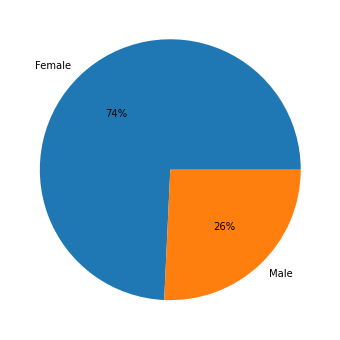

In [80]:
#Gender 
plt.figure(figsize=(10,6))
plt.pie(data["gender"].value_counts(),labels=data["gender"].unique(),autopct='%1.f%%')
plt.show()

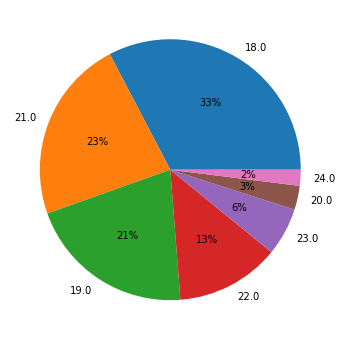

In [51]:
#Age
plt.figure(figsize=(10,6))
plt.pie(data["Age"].value_counts(),labels=data["Age"].unique(),autopct='%1.f%%')
plt.show()

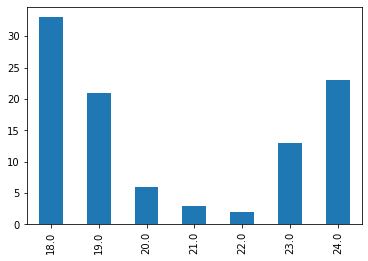

In [68]:
#Age
data["Age"].value_counts().sort_index().plot.bar()
plt.show()

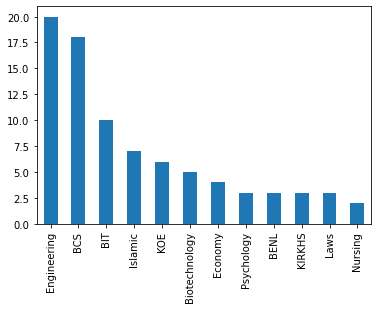

In [75]:
#Course
data["course"].value_counts()[:12].plot.bar()
plt.show()

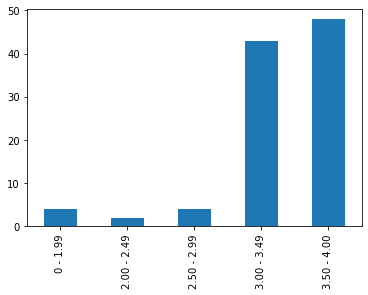

In [77]:
#CGPA
data["CGPA"].value_counts().sort_index().plot.bar()
plt.show()

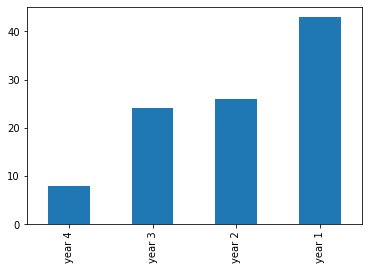

In [79]:
#Studying year
data["studying_year"].value_counts().sort_values().plot.bar()
plt.show()

#### Insights: 
* 74% of the students in the dataset are females
* 33% of the students in the dataset are 18 years old 
* 57% of the students in the dataset are 19, 21, 22 years old. 
* 45% of the students are in the first year. 
* Most of students studies Engineering or BCS
* Most of the students have a CGPA between 3.5 - 4 or 3.0 - 3.49


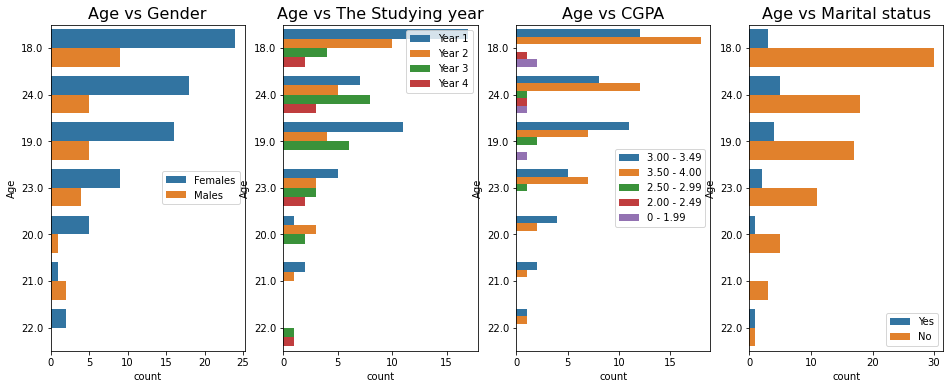

In [98]:
# Age coorelations
fig, ax = plt.subplots(1, 4, figsize=(16,6)) 
sns.countplot(y='Age', hue='gender', 
              data=data, order=data['Age'].value_counts().index,ax=ax[0])
ax[0].set_title("Age vs Gender", fontsize = 16)
ax[0].legend(["Females","Males"])

sns.countplot(y='Age', hue='studying_year', 
              data=data, order=data['Age'].value_counts().index,ax=ax[1])
ax[1].set_title("Age vs The Studying year", fontsize = 16)
ax[1].legend(["Year 1","Year 2","Year 3","Year 4"])

sns.countplot(y='Age', hue='CGPA', 
              data=data, order=data['Age'].value_counts().index,ax=ax[2])
ax[2].set_title("Age vs CGPA", fontsize = 16)
ax[2].legend(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49','0 - 1.99'])

sns.countplot(y='Age', hue='Marital status', 
              data=data, order=data['Age'].value_counts().index,ax=ax[3])
ax[3].set_title("Age vs Marital status", fontsize = 16)
ax[3].legend(["Yes","No"])

plt.show()

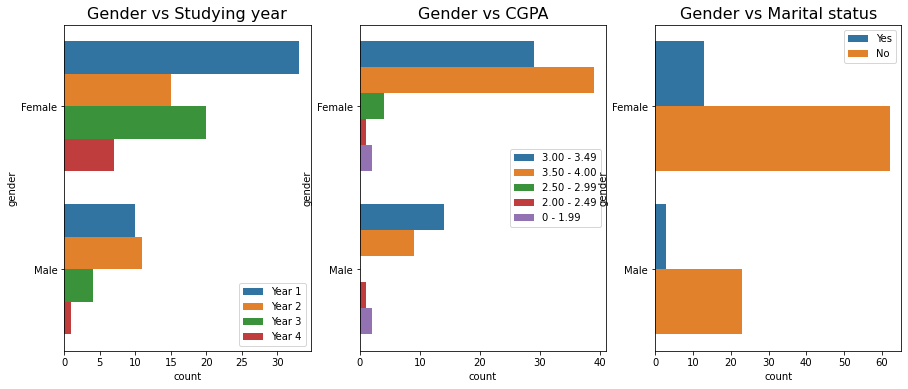

In [109]:
# Gender coorelations
fig, ax = plt.subplots(1, 3, figsize=(15,6)) 
sns.countplot(y='gender', hue='studying_year', 
              data=data, order=data['gender'].value_counts().index,ax=ax[0])
ax[0].set_title("Gender vs Studying year", fontsize = 16)
ax[0].legend(["Year 1","Year 2","Year 3","Year 4"])

sns.countplot(y='gender', hue='CGPA', 
              data=data, order=data['gender'].value_counts().index,ax=ax[1])
ax[1].set_title("Gender vs CGPA", fontsize = 16)
ax[1].legend(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49','0 - 1.99'])

sns.countplot(y='gender', hue='Marital status', 
              data=data, order=data['gender'].value_counts().index,ax=ax[2])
ax[2].set_title("Gender vs Marital status", fontsize = 16)
ax[2].legend(["Yes","No"])

plt.show()

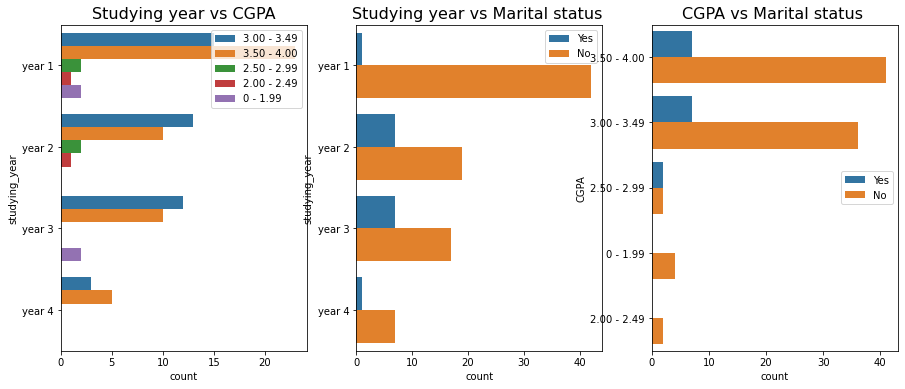

In [118]:
#Studying year & Martial status coorlelations 
fig, ax = plt.subplots(1, 3, figsize=(15,6)) 
sns.countplot(y='studying_year', hue='CGPA', 
              data=data, order=data['studying_year'].value_counts().index,ax=ax[0])
ax[0].set_title("Studying year vs CGPA", fontsize = 16)
ax[0].legend(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49','0 - 1.99'])

sns.countplot(y='studying_year', hue='Marital status', 
              data=data, order=data['studying_year'].value_counts().index,ax=ax[1])
ax[1].set_title("Studying year vs Marital status ", fontsize = 16)
ax[1].legend(["Yes","No"])

sns.countplot(y='CGPA', hue='Marital status', 
              data=data, order=data['CGPA'].value_counts().index,ax=ax[2])
ax[2].set_title("CGPA vs Marital status ", fontsize = 16)
ax[2].legend(["Yes","No"])
plt.show()

### Depression

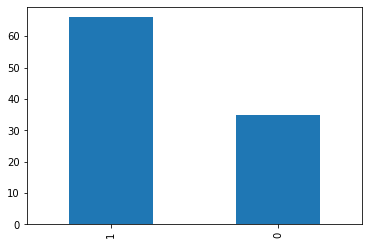

In [38]:
data["isDepression"].value_counts().plot.bar()
plt.show()

65% of students don't have depression.

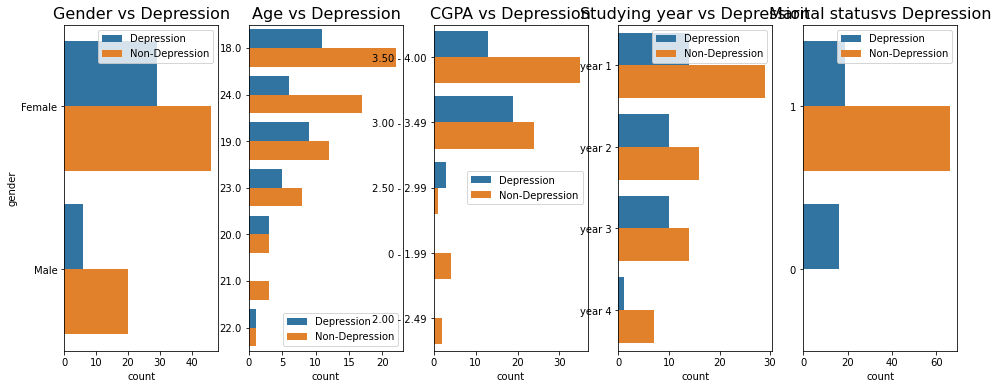

In [134]:
fig, ax = plt.subplots(1, 5, figsize=(16,6)) 
sns.countplot(y='gender', hue='isDepression', 
              data=data, order=data['gender'].value_counts().index,ax=ax[0])
ax[0].set_title("Gender vs Depression", fontsize = 16)
ax[0].legend(["Depression","Non-Depression"])

sns.countplot(y='Age', hue='isDepression', 
              data=data, order=data['Age'].value_counts(ascending=False).index,
              ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_title("Age vs Depression", fontsize = 16)
ax[1].legend(["Depression","Non-Depression"])

sns.countplot(y='CGPA', hue='isDepression', 
              data=data, order=data['CGPA'].value_counts(ascending=False).index,
              ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_title("CGPA vs Depression", fontsize = 16)
ax[2].legend(["Depression","Non-Depression"])

sns.countplot(y='studying_year', hue='isDepression', 
              data=data, order=data['studying_year'].value_counts(ascending=False).index,
              ax=ax[3])
ax[3].set_ylabel(None)
ax[3].set_title("Studying year vs Depression", fontsize = 16)
ax[3].legend(["Depression","Non-Depression"])

sns.countplot(y='Marital status', hue='isDepression', 
              data=data, order=data['Marital status'].value_counts(ascending=False).index,
              ax=ax[4])
ax[4].set_ylabel(None)
ax[4].set_title("Marital statusvs Depression", fontsize = 16)
ax[4].legend(["Depression","Non-Depression"])
plt.show()

* Females who have depression are more than males. <br> num of people who don't have depression is higher than people who don't
* people at age 18 are more likely to have depression, then people at 19, then people at 24, 23,20,22,21
* Students whose CGPA is from 3-3.49 are more likely to have depression 
* People in the first year are more likely to have depression, people in the fourth year are least likely.. 

## Anxiety 

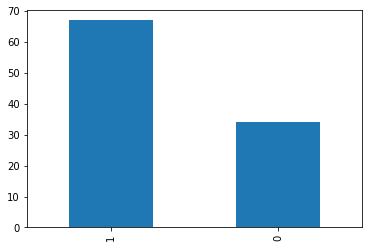

In [87]:
data["isAnxiety"].value_counts().plot.bar()
plt.show()

almost 35% of students have anxiety

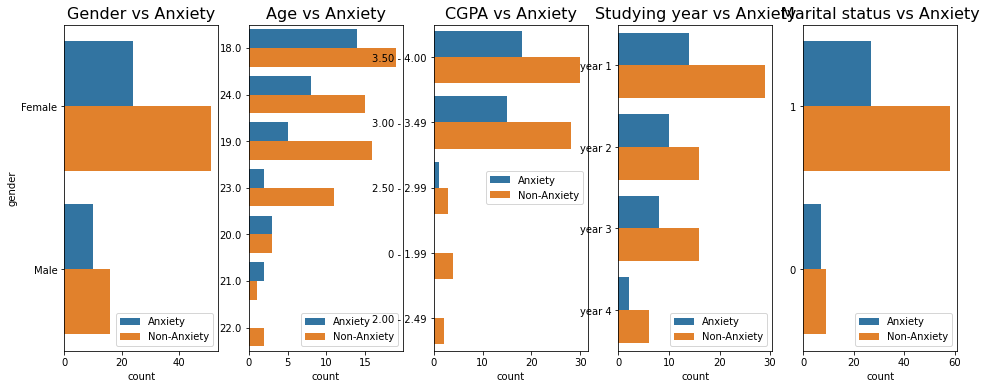

In [135]:
fig, ax = plt.subplots(1, 5, figsize=(16,6)) 
sns.countplot(y='gender', hue='isAnxiety', 
              data=data, order=data['gender'].value_counts().index,ax=ax[0])
ax[0].set_title("Gender vs Anxiety", fontsize = 16)
ax[0].legend(["Anxiety","Non-Anxiety"])

sns.countplot(y='Age', hue='isAnxiety', 
              data=data, order=data['Age'].value_counts(ascending=False).index,
              ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_title("Age vs Anxiety", fontsize = 16)
ax[1].legend(["Anxiety","Non-Anxiety"])

sns.countplot(y='CGPA', hue='isAnxiety', 
              data=data, order=data['CGPA'].value_counts(ascending=False).index,
              ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_title("CGPA vs Anxiety", fontsize = 16)
ax[2].legend(["Anxiety","Non-Anxiety"])

sns.countplot(y='studying_year', hue='isAnxiety', 
              data=data, order=data['studying_year'].value_counts(ascending=False).index,
              ax=ax[3])
ax[3].set_ylabel(None)
ax[3].set_title("Studying year vs Anxiety", fontsize = 16)
ax[3].legend(["Anxiety","Non-Anxiety"])

sns.countplot(y='Marital status', hue='isAnxiety', 
              data=data, order=data['Marital status'].value_counts(ascending=False).index,
              ax=ax[4])
ax[4].set_ylabel(None)
ax[4].set_title("Marital status vs Anxiety", fontsize = 16)
ax[4].legend(["Anxiety","Non-Anxiety"])

plt.show()

### Panic

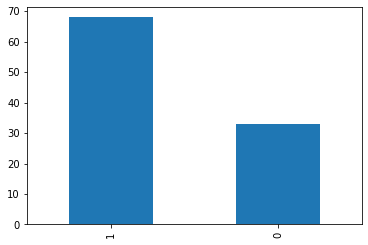

In [119]:
data["isPanic"].value_counts().plot.bar()
plt.show()

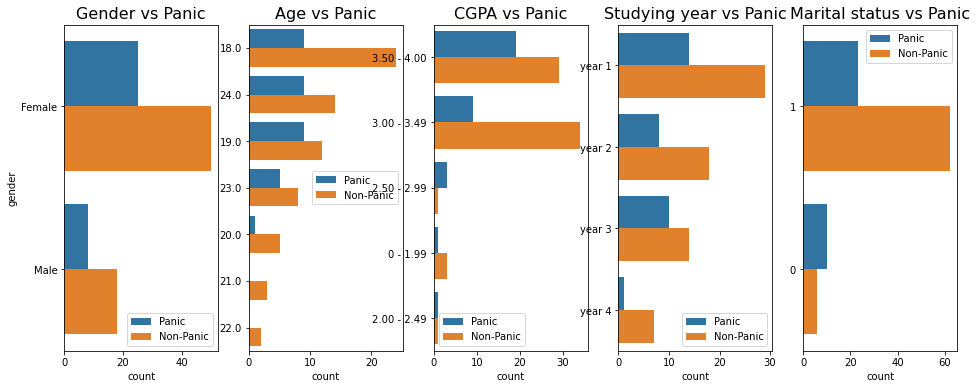

In [136]:
fig, ax = plt.subplots(1, 5, figsize=(16,6)) 
sns.countplot(y='gender', hue='isPanic', 
              data=data, order=data['gender'].value_counts().index,ax=ax[0])
ax[0].set_title("Gender vs Panic", fontsize = 16)
ax[0].legend(["Panic","Non-Panic"])

sns.countplot(y='Age', hue='isPanic', 
              data=data, order=data['Age'].value_counts(ascending=False).index,
              ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_title("Age vs Panic", fontsize = 16)
ax[1].legend(["Panic","Non-Panic"])

sns.countplot(y='CGPA', hue='isPanic', 
              data=data, order=data['CGPA'].value_counts(ascending=False).index,
              ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_title("CGPA vs Panic", fontsize = 16)
ax[2].legend(["Panic","Non-Panic"])

sns.countplot(y='studying_year', hue='isPanic', 
              data=data, order=data['studying_year'].value_counts(ascending=False).index,
              ax=ax[3])
ax[3].set_ylabel(None)
ax[3].set_title("Studying year vs Panic", fontsize = 16)
ax[3].legend(["Panic","Non-Panic"])

sns.countplot(y='Marital status', hue='isPanic', 
              data=data, order=data['Marital status'].value_counts(ascending=False).index,
              ax=ax[4])
ax[4].set_ylabel(None)
ax[4].set_title("Marital status vs Panic", fontsize = 16)
ax[4].legend(["Panic","Non-Panic"])

plt.show()

### Seeking for treatment

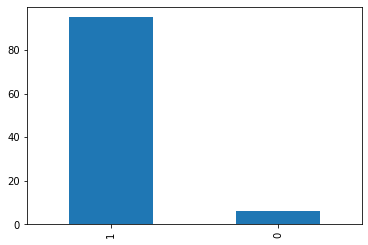

In [123]:
data["treatment"].value_counts().plot.bar()
plt.show()

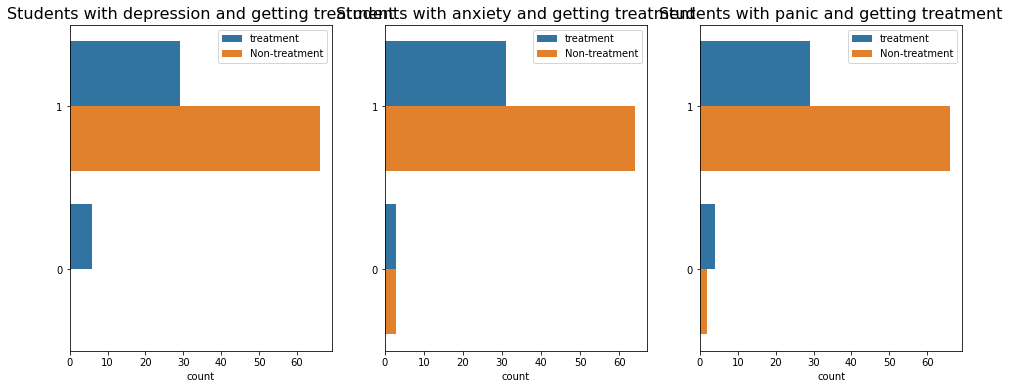

In [138]:
fig, ax = plt.subplots(1, 3, figsize=(16,6)) 
sns.countplot(y='treatment', hue='isDepression', 
              data=data, order=data['treatment'].value_counts(ascending=False).index,ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_title("Students with depression and getting treatment", fontsize = 16)
ax[0].legend(["treatment","Non-treatment"])

sns.countplot(y='treatment', hue='isAnxiety', 
              data=data, order=data['treatment'].value_counts(ascending=False).index,ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_title("Students with anxiety and getting treatment", fontsize = 16)
ax[1].legend(["treatment","Non-treatment"])

sns.countplot(y='treatment', hue='isPanic', 
              data=data, order=data['treatment'].value_counts(ascending=False).index,ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_title("Students with panic and getting treatment", fontsize = 16)
ax[2].legend(["treatment","Non-treatment"])

plt.show()

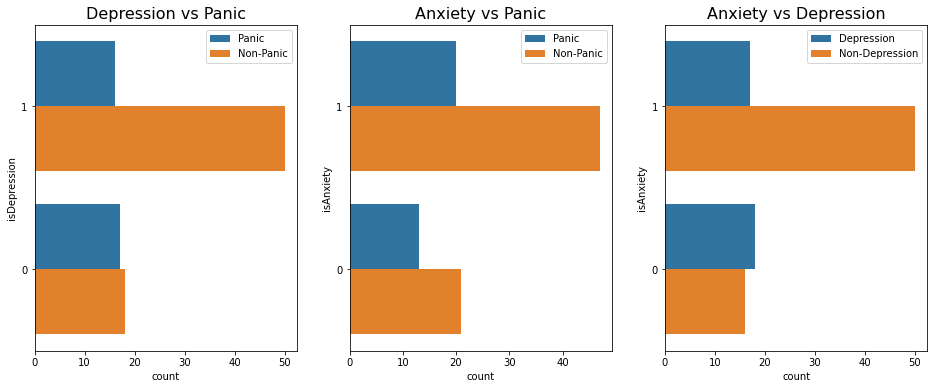

In [147]:
fig, ax = plt.subplots(1, 3, figsize=(16,6)) 
sns.countplot(y='isDepression', hue='isPanic', 
              data=data, order=data['isDepression'].value_counts().index,ax=ax[0])
ax[0].set_title("Depression vs Panic", fontsize = 16)
ax[0].legend(["Panic","Non-Panic"])

sns.countplot(y='isAnxiety', hue='isPanic', 
              data=data, order=data['isAnxiety'].value_counts().index,ax=ax[1])
ax[1].set_title("Anxiety vs Panic", fontsize = 16)
ax[1].legend(["Panic","Non-Panic"])

sns.countplot(y='isAnxiety', hue='isDepression', 
              data=data, order=data['isAnxiety'].value_counts().index,ax=ax[2])
ax[2].set_title("Anxiety vs Depression", fontsize = 16)
ax[2].legend(["Depression","Non-Depression"])
plt.show()

In [148]:
data[["isAnxiety","isDepression"]].value_counts()

isAnxiety  isDepression
1          1               50
0          0               18
1          0               17
0          1               16
dtype: int64

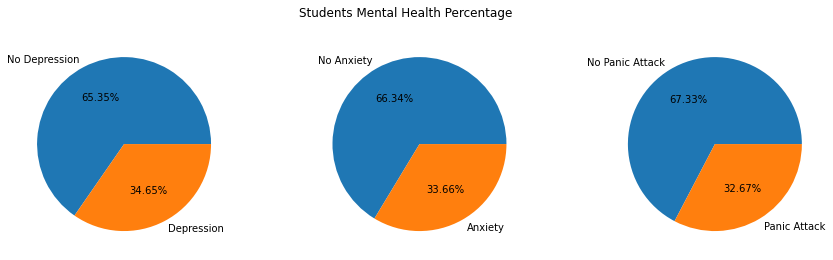

In [121]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))

ax1.pie(data['isDepression'].value_counts(),labels=("No Depression","Depression"), autopct='%1.2f%%')

ax2.pie(data['isAnxiety'].value_counts(), labels=("No Anxiety","Anxiety"), autopct='%1.2f%%')

ax3.pie(data['isPanic'].value_counts(), labels=("No Panic Attack","Panic Attack"), autopct='%1.2f%%')

plt.suptitle("Students Mental Health Percentage")
plt.show()